In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import intake
%matplotlib inline
#from tqdm.autonotebook import tqdm
import time
import cftime
#import cdo
#cdo = cdo.Cdo()
import xesmf as xe
import gcsfs

In [3]:
#cat_url = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json" #use this inside of CCCma science net
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"       # use this outside of CCCma / for public data
col = intake.open_esm_datastore(cat_url)
query = dict(experiment_id=['ssp245'], table_id=['Omon'], member_id='r1i1p1f1',
             variable_id=['fgco2'], source_id='CanESM5')
cat = col.search(**query)

ds_g = cat.to_dataset_dict(zarr_kwargs={"consolidated": True, "decode_times": True}, cdf_kwargs={'chunks': {'time':1032}})['ScenarioMIP.CCCma.CanESM5.ssp245.Omon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [4]:
cat_url = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json" #use this inside of CCCma science net
#cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"       # use this outside of CCCma / for public data
col = intake.open_esm_datastore(cat_url)

query = dict(experiment_id=['ssp245'], table_id=['Omon'], member_id='r1i1p1f1',
             variable_id=['fgco2'], source_id='CanESM5')
cat = col.search(**query)

ds_c = cat.to_dataset_dict()['ScenarioMIP.CCCma.CanESM5.ssp245.Omon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
ds_g

<xarray.Dataset>
Dimensions:             (member_id: 1, time: 1032, j: 291, i: 360, bnds: 2, vertices: 4)
Coordinates:
    depth               float64 ...
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
  * member_id           (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    fgco2               (member_id, time, j, i) float32 dask.array<chunksize=(1, 199, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float32 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float32 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/58)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           094aa868e787693cfe55b2f1665f6a6b0880b03a
    CCCma_runid:                 rc3.1-s4501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    version:                     v20190306
    status:                      2019-11-15;created;by nhn2@columbia.edu
    netcdf_tracking_ids:         hdl:21.14100/cfb4c9a3-1ff7-4f60-aff4-a7a6064...
    version_id:                  v20190429
    intake_esm_varname:          ['fgco2']
    intake_esm_dataset_key:      ScenarioMIP.CCCma.CanESM5.ssp245.Omon.gn

In [6]:
ds_c

<xarray.Dataset>
Dimensions:             (time: 1032, bnds: 2, j: 291, i: 360, vertices: 4, member_id: 1)
Coordinates:
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    depth               float64 ...
  * member_id           (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    fgco2               (member_id, time, j, i) float32 dask.array<chunksize=(1, 1032, 291, 360), meta=np.ndarray>
Attributes: (12/55)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s4501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0
    tracking_id:                 hdl:21.14100/fb830cda-15e3-46fb-943d-82b5817...
    intake_esm_varname:          ['fgco2']
    intake_esm_dataset_key:      ScenarioMIP.CCCma.CanESM5.ssp245.Omon.gn

In [7]:
ds_g.isel(time=0).fgco2.squeeze().plot()

ValueError: destination buffer too small; expected at least 838080, got 419040

In [ ]:
ds_out = xe.util.grid_global(1, 1)
regridder = xe.Regridder(ds_c, ds_out, 'bilinear', periodic=True)
ds_rm = regridder(ds_g)


/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


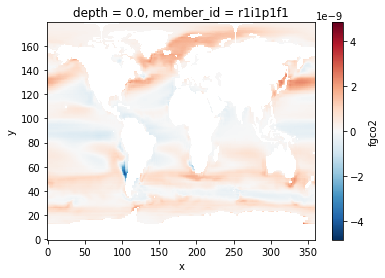

In [ ]:
ds_rm.mean(dim='time')['fgco2'].plot()

In [8]:
# HArd download from ESGF == CCCma FTP (same data)
# ftp does not work on science.gc.ca so I downloaded on lxwrk and scp'd it
#!wget ftp://ftp.cccma.ec.gc.ca/pub/AR6/esgD/ScenarioMIP/CCCma/CanESM5/ssp245/r1i1p1f1/Omon/fgco2/gn/v20190429/fgco2_Omon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012.nc

In [9]:
ds = xr.open_dataset('/home/ncs001/runpath3/fgco2_Omon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012.nc')

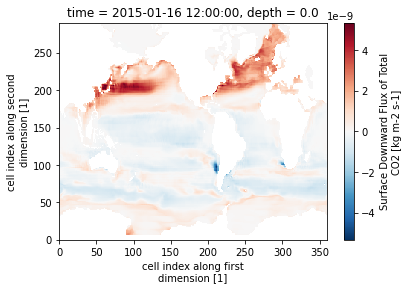

In [10]:
ds.isel(time=0).fgco2.squeeze().plot()

In [21]:
#cat_url = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json" #use this inside of CCCma science net
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"       # use this outside of CCCma / for public data
col = intake.open_esm_datastore(cat_url)
query = dict(experiment_id=['ssp245'], table_id=['Omon'], member_id='r1i1p2f1',
             variable_id=['tos'], source_id='CanESM5')
cat = col.search(**query)

ds_g_tos = cat.to_dataset_dict(zarr_kwargs={"consolidated": True, "decode_times": True}, cdf_kwargs={'chunks': None})['ScenarioMIP.CCCma.CanESM5.ssp245.Omon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [22]:
ds_g_tos.load()

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1032, bnds: 2, member_id: 1, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 -78.39 -78.39 -78.39 ... 50.23 50.01
    longitude           (j, i) float64 73.5 74.5 75.5 76.5 ... 72.95 72.96 72.99
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
    time_bnds           (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-0...
  * member_id           (member_id) <U8 'r1i1p2f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (member_id, time, j, i) float32 nan nan nan ... nan nan
    vertices_latitude   (j, i, vertices) float64 -78.29 -78.49 ... 50.11 50.11
    vertices_longitude  (j, i, vertices) float64 74.0 74.0 73.0 ... 72.95 73.0
Attributes: (12/58)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          p2-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 p2-s4501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    variant_label:               r1i1p2f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/40581124-fa83-4249-b10d-d01b754...
    version_id:                  v20190429
    intake_esm_varname:          ['tos']
    intake_esm_dataset_key:      ScenarioMIP.CCCma.CanESM5.ssp245.Omon.gn